In [2]:
#!pip install GetOldTweets3
#!pip install pytrends --upgrade

     |████████████████████████████████| 5.4 MB 1.6 MB/s eta 0:00:01


In [1]:
import seaborn as sns

from sklearn.ensemble import IsolationForest

import numpy as np
import pandas as pd
#import GetOldTweets3 as got
import matplotlib.pyplot as plt
import matplotlib

### Tweet archive

In [2]:
'''
def get_tweets(term_search, top_only=True):
    
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(term_search)\
                                               .setTopTweets(top_only)\
                                               .setSince("2015-09-01")\
                                               .setUntil("2020-09-06")\
                                               .setMaxTweets(15000)
    #List of objects stored in tweets variable
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    #Iterate through tweets variable object & get 
    text_tweets = [[tweet.id,
                    tweet.permalink,
                    tweet.to,
                    tweet.username,
                    tweet.text,
                    tweet.date,
                    tweet.retweets,
                    tweet.favorites,
                    tweet.mentions,
                    tweet.hashtags] for tweet in tweets]
    #print(text_tweets, date_tweets)
    # create dataframe
    # tweets corresponding to tweet attributes
    twitter_df = pd.DataFrame(text_tweets, 
                            columns = ['id', 'permalink','to','username', 'text',
                                       'date', 'retweets','favorites','mentions', 'hashtags'])
    return twitter_df
    '''

'\ndef get_tweets(term_search, top_only=True):\n    \n    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(term_search)                                               .setTopTweets(top_only)                                               .setSince("2015-09-01")                                               .setUntil("2020-09-06")                                               .setMaxTweets(15000)\n    #List of objects stored in tweets variable\n    tweets = got.manager.TweetManager.getTweets(tweetCriteria)\n    #Iterate through tweets variable object & get \n    text_tweets = [[tweet.id,\n                    tweet.permalink,\n                    tweet.to,\n                    tweet.username,\n                    tweet.text,\n                    tweet.date,\n                    tweet.retweets,\n                    tweet.favorites,\n                    tweet.mentions,\n                    tweet.hashtags] for tweet in tweets]\n    #print(text_tweets, date_tweets)\n    # create data

In [3]:
#company_sources = ['Tesla', 'Wells Fargo', 'Amazon', 'FedEx', 'Tilray',
               #'Palantir Technologies','Beyond Meat', 'Pan American Silver']
#news_df = get_tweets(company_sources, 
                     #top_only = True,).sort_values('Date',ascending=False)

In [4]:
#!pip install newsapi-python

In [5]:
from newsapi import NewsApiClient
#Init
newsapi = NewsApiClient(api_key='97b34ca6302b41c1ac70cb74d09b4279')

sources = newsapi.get_sources()
d = {}
for i in range(128):
    d[sources['sources'][i]['name']] = sources['sources'][i]['url']

source_list = ['The Washington Times','The Washington Post','The Wall Street Journal',
              'The Huffington Post', 'TechRadar','TechCrunch','Reuters','MSNBC','InfoMoney',
              'Hacker News','Google News','Buzzfeed','Bloomberg','Business Insider','CNN']
source_media = {}
for i in source_list:
    source_media[i] = d[i]
source_media

{'The Washington Times': 'https://www.washingtontimes.com/',
 'The Washington Post': 'https://www.washingtonpost.com',
 'The Wall Street Journal': 'http://www.wsj.com',
 'The Huffington Post': 'http://www.huffingtonpost.com',
 'TechRadar': 'http://www.techradar.com',
 'TechCrunch': 'https://techcrunch.com',
 'Reuters': 'http://www.reuters.com',
 'MSNBC': 'http://www.msnbc.com',
 'InfoMoney': 'https://www.infomoney.com.br',
 'Hacker News': 'https://news.ycombinator.com',
 'Google News': 'https://news.google.com',
 'Buzzfeed': 'https://www.buzzfeed.com',
 'Bloomberg': 'http://www.bloomberg.com',
 'Business Insider': 'http://www.businessinsider.com',
 'CNN': 'http://us.cnn.com'}

In [6]:
'''
# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='Amazon',
                                          sources='The Washington Times',
                                          language='en')
top_headlines

# /v2/everything
all_articles = newsapi.get_everything(q='Tesla',
                                      sources='Bloomberg',
                                      domains='http://www.bloomberg.com',
                                      from_param='2020-08-17',
                                      to='2020-09-01',
                                      language='en',
                                      sort_by='relevancy')
all_articles
'''

"\n# /v2/top-headlines\ntop_headlines = newsapi.get_top_headlines(q='Amazon',\n                                          sources='The Washington Times',\n                                          language='en')\ntop_headlines\n\n# /v2/everything\nall_articles = newsapi.get_everything(q='Tesla',\n                                      sources='Bloomberg',\n                                      domains='http://www.bloomberg.com',\n                                      from_param='2020-08-17',\n                                      to='2020-09-01',\n                                      language='en',\n                                      sort_by='relevancy')\nall_articles\n"

### GOOGLE TRENDS

In [7]:
!pip install pytrends

     |████████████████████████████████| 5.4 MB 2.7 MB/s eta 0:00:01


In [8]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

keywords = ['Tesla', 'Wells Fargo', 'Amazon', 'FedEx', 'Tilray']
keywords1 = ['Palantir Technologies','Beyond Meat', 'Pan American Silver']

#Might use gprop='' for IMAGES
pytrends.build_payload(keywords, timeframe='today 5-y')

data = pytrends.interest_over_time()

pytrends.build_payload(keywords1, timeframe='today 5-y')
data1 = pytrends.interest_over_time()

result = pd.concat([data, data1], axis=1)
result = result[['Tesla','Wells Fargo','Amazon','FedEx','Tilray','Palantir Technologies','Beyond Meat','Pan American Silver']]
result

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver
date,,,,,,,,
2015-09-27,3,6,53,4,0,0,1,0
2015-10-04,2,6,53,3,0,0,1,0
2015-10-11,2,6,60,3,0,0,1,0
2015-10-18,2,6,55,3,0,0,1,0
2015-10-25,2,6,59,3,0,0,1,0
...,...,...,...,...,...,...,...,...
2020-08-16,6,4,75,5,0,0,18,1
2020-08-23,6,4,74,5,0,1,18,1
2020-08-30,9,4,75,5,0,0,17,1


In [9]:
'''
def change_date_format(data_f):
    data_f['DATE']=pd.to_datetime(data_f['DATE'])
    data_f['DATE']=data_f['DATE'].dt.strftime("%m/%d/%y")
    data_f['DATE']=pd.to_datetime(data_f['DATE'])
    return data_f
result['DATE'] = result.index
result = change_date_format(result)
result
'''

'\ndef change_date_format(data_f):\n    data_f[\'DATE\']=pd.to_datetime(data_f[\'DATE\'])\n    data_f[\'DATE\']=data_f[\'DATE\'].dt.strftime("%m/%d/%y")\n    data_f[\'DATE\']=pd.to_datetime(data_f[\'DATE\'])\n    return data_f\nresult[\'DATE\'] = result.index\nresult = change_date_format(result)\nresult\n'

In [10]:
CEO_list = ['@elonmusk', '@WellsFargo', '@JeffBezos', '@FedEx', '@BrendanTKennedy', '@PalantirTech', '@BeyondMeat', '@PanAmericanSlvr']

In [11]:
import matplotlib.pyplot as plt

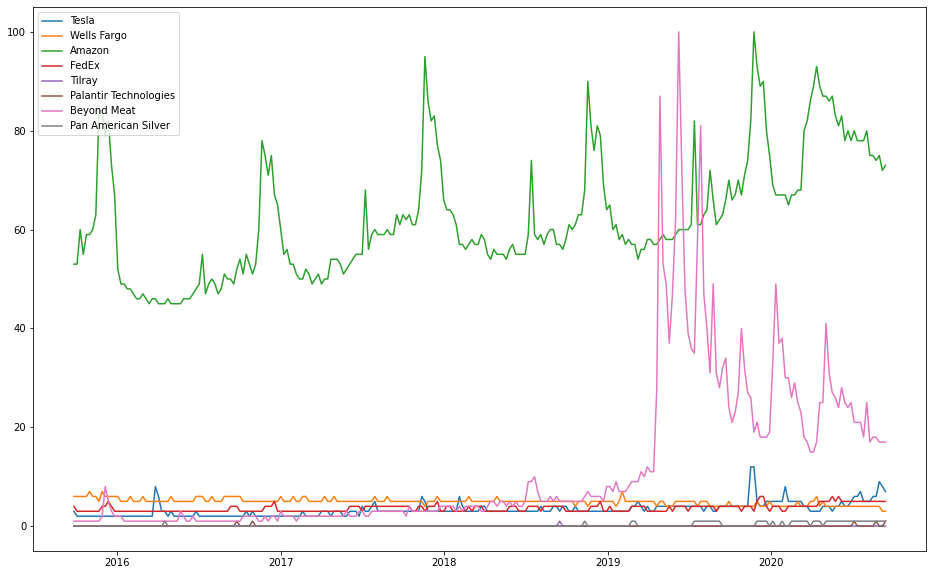

In [12]:
plt.subplots(figsize =(16, 10))
plt.plot(result)
plt.legend(result.columns,loc='upper left')
plt.show()

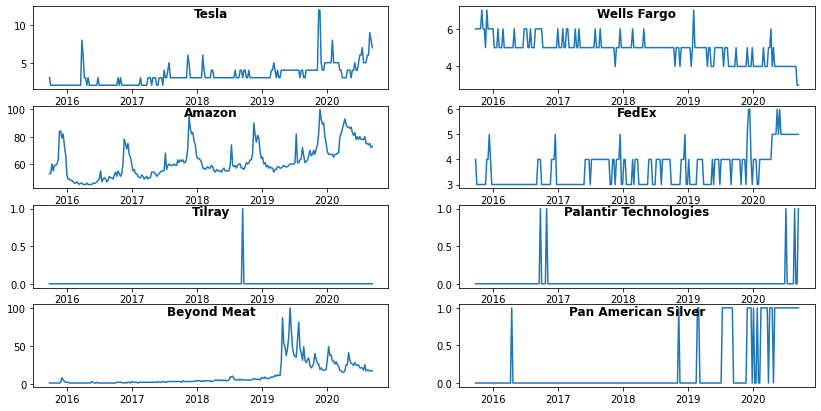

In [13]:
fig, axs = plt.subplots(4, 2,figsize =(14, 7))
for i,ax in zip(result.columns,axs.flatten()):
    ax.set_title(i, fontweight ="bold", y=.8)
    ax.plot(result[i])
plt.show()

# Alot of noise appears in the graphs. Might use Arima or Sarima
### REMOVE SEASONALITY

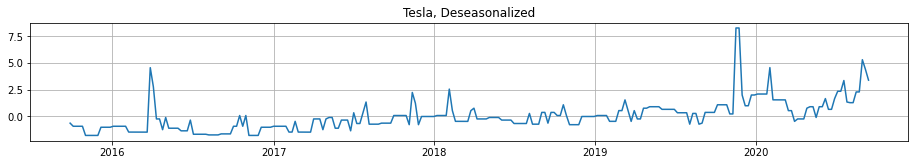

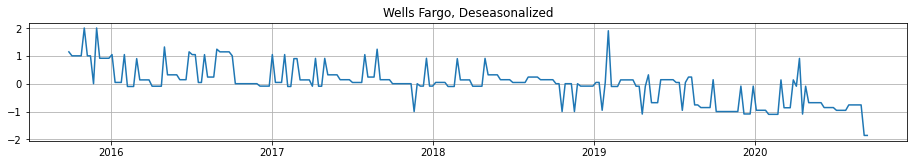

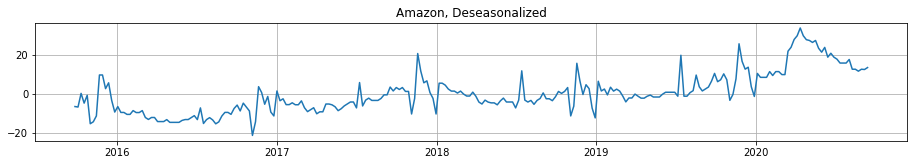

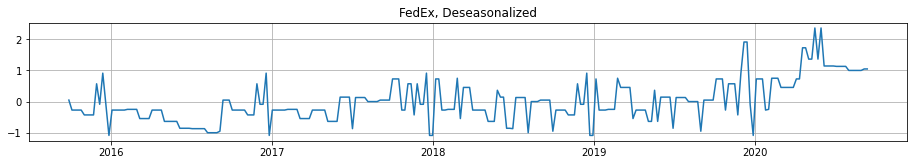

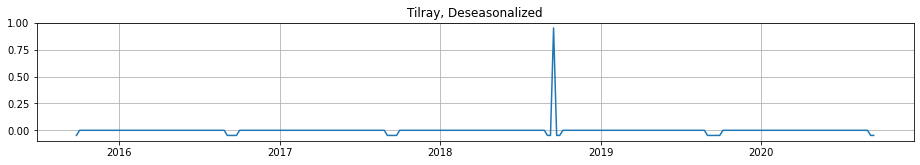

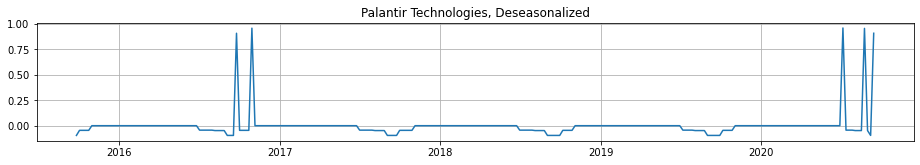

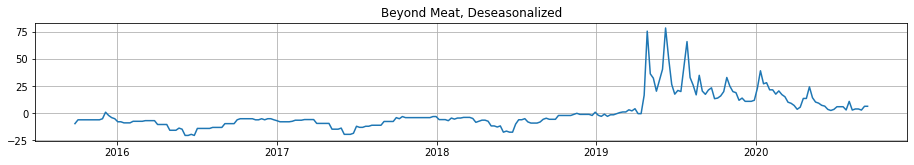

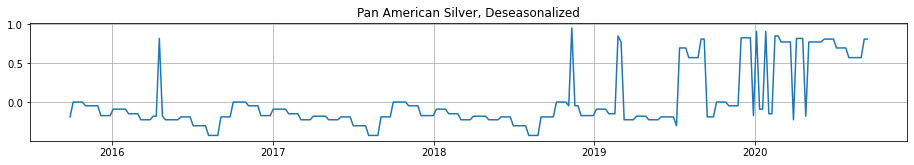

In [14]:
def plotter(function, *args, **kwargs):
    fig, ax = plt.subplots(figsize=(6.4 * 2, 4.8 / 2), tight_layout=True)
    function(ax, *args, **kwargs)
    plt.grid()
    plt.show()

def fit_seasonal_trend(series):
    # Only take 11 of the 12 dummies to avoid strict colinearity.
    dummies = pd.get_dummies(series.index.month, drop_first=True)
    X = np.concatenate((np.ones((len(dummies), 1)), dummies), axis=1)
    y = series.values.reshape(-1, 1)
    return X @ np.linalg.inv(X.T @ X) @ X.T @ y

def plot_deseasonalized(ax, name, series):
    series_deseasonalized = series - fit_seasonal_trend(series).reshape(-1, )
    ax.plot(series_deseasonalized.index, series_deseasonalized)
    ax.set(title=f"{name}, Deseasonalized")

for i in result.columns:
    plotter(plot_deseasonalized, i, result[i])

### Anomaly Detection

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
result.describe()

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,3.338462,4.934615,62.200000,3.623077,0.003846,0.019231,11.534615,0.184615
std,1.449558,0.657268,12.045217,0.722131,0.062017,0.137600,15.884560,0.388734
min,2.000000,3.000000,45.000000,3.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,5.000000,54.000000,3.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,5.000000,59.000000,3.000000,0.000000,0.000000,4.000000,0.000000
75%,4.000000,5.000000,68.000000,4.000000,0.000000,0.000000,18.000000,0.000000
max,12.000000,7.000000,100.000000,6.000000,1.000000,1.000000,100.000000,1.000000


In [18]:
X1=result['Tesla'].values.reshape(-1, 1)
X2=result['Wells Fargo'].values.reshape(-1, 1)
X3=result['Amazon'].values.reshape(-1, 1)
X4=result['FedEx'].values.reshape(-1, 1)
X5=result['Tilray'].values.reshape(-1, 1)
X6=result['Palantir Technologies'].values.reshape(-1, 1)
X7=result['Beyond Meat'].values.reshape(-1, 1)
X8=result['Pan American Silver'].values.reshape(-1, 1)

clf1 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=0).fit(X1)
clf2 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.8),max_features=1.0,random_state=0).fit(X2)
clf3 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.8),max_features=1.0,random_state=0).fit(X3)
clf4 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=0).fit(X4)
clf5 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=0).fit(X5)
clf6 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=0).fit(X6)
clf7 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=0).fit(X7)
clf8 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=0).fit(X8)

In [19]:
result['Anomaly_Tesla']=result['Tesla'].apply(lambda x: 1 if x >= result['Tesla'].quantile(.95) else 0)
result['Anomaly_Wells_Fargo']=result['Wells Fargo'].apply(lambda x: 1 if x >= result['Wells Fargo'].quantile(.95) else 0)
result['Anomaly_Amazon']=result['Amazon'].apply(lambda x: 1 if x >= result['Amazon'].quantile(.95) else 0)
result['Anomaly_FedEx']=result['FedEx'].apply(lambda x: 1 if x >= result['FedEx'].quantile(.95) else 0)
result['Anomaly_Tilray']=result['Tilray'].apply(lambda x: 1 if x >= result['Tilray'].quantile(.99) else 0)
result['Anomaly_Palantir_Technologies']=result['Palantir Technologies'].apply(lambda x: 1 if x >= result['Palantir Technologies'].quantile(.99) else 0)
result['Anomaly_Beyond_Meat']=result['Beyond Meat'].apply(lambda x: 1 if x >= result['Beyond Meat'].quantile(.95) else 0)
result['Anomaly_Pan_American_Silver']=result['Pan American Silver'].apply(lambda x: 1 if x >= result['Pan American Silver'].quantile(.95) else 0)

In [20]:
result[result['Anomaly_Pan_American_Silver']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2016-04-17,3,5,45,3,0,0,1,1,0,0,0,0,1,0,0,1
2018-11-11,3,5,68,3,0,0,6,1,0,0,0,0,1,0,0,1
2019-02-24,4,5,57,4,0,0,9,1,0,0,0,0,1,0,0,1
2019-03-03,4,5,57,4,0,0,9,1,0,0,0,0,1,0,0,1
2019-07-14,4,5,82,4,0,0,35,1,0,0,0,0,1,0,0,1
2019-07-21,4,4,61,4,0,0,58,1,0,0,0,0,1,0,1,1
2019-07-28,4,5,61,4,0,0,81,1,0,0,0,0,1,0,1,1
2019-08-04,3,5,63,4,0,0,47,1,0,0,0,0,1,0,1,1
2019-08-11,4,5,64,4,0,0,40,1,0,0,0,0,1,0,0,1


In [21]:
result[result['Anomaly_Beyond_Meat']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2019-04-28,4,5,58,3,0,0,87,0,0,0,0,0,1,0,1,0
2019-05-05,4,5,59,3,0,0,53,0,0,0,0,0,1,0,1,0
2019-05-12,4,4,58,3,0,0,49,0,0,0,0,0,1,0,1,0
2019-05-26,4,4,58,3,0,0,47,0,0,0,0,0,1,0,1,0
2019-06-02,4,5,59,4,0,0,62,0,0,0,0,0,1,0,1,0
2019-06-09,4,5,60,4,0,0,100,0,0,0,0,0,1,0,1,0
2019-06-16,4,5,60,4,0,0,72,0,0,0,0,0,1,0,1,0
2019-06-23,4,5,60,4,0,0,48,0,0,0,0,0,1,0,1,0
2019-07-21,4,4,61,4,0,0,58,1,0,0,0,0,1,0,1,1


In [22]:
result[result['Anomaly_Palantir_Technologies']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2016-09-25,2,6,52,4,0,1,1,0,0,1,0,0,1,1,0,0
2016-10-30,3,5,51,3,0,1,2,0,0,0,0,0,1,1,0,0
2020-07-05,6,4,80,5,0,1,21,1,1,0,0,1,1,1,0,1
2020-08-23,6,4,74,5,0,1,18,1,1,0,0,1,1,1,0,1
2020-09-13,7,3,73,5,0,1,17,1,1,0,0,1,1,1,0,1


In [23]:
result[result['Anomaly_Tilray']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2015-09-27,3,6,53,4,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-04,2,6,53,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-11,2,6,60,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-18,2,6,55,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-25,2,6,59,3,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16,6,4,75,5,0,0,18,1,1,0,0,1,1,0,0,1
2020-08-23,6,4,74,5,0,1,18,1,1,0,0,1,1,1,0,1
2020-08-30,9,4,75,5,0,0,17,1,1,0,0,1,1,0,0,1


In [24]:
result[result['Anomaly_FedEx']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2015-12-13,2,6,82,5,0,0,5,0,0,1,0,1,1,0,0,0
2016-12-18,2,5,67,5,0,0,2,0,0,0,0,1,1,0,0,0
2017-12-17,3,6,77,5,0,0,3,0,0,1,0,1,1,0,0,0
2018-12-16,3,5,79,5,0,0,6,0,0,0,0,1,1,0,0,0
2019-12-01,5,5,93,5,0,0,21,1,0,0,1,1,1,0,0,1
2019-12-08,4,4,89,6,0,0,18,1,0,0,1,1,1,0,0,1
2019-12-15,4,4,90,6,0,0,18,1,0,0,1,1,1,0,0,1
2020-04-19,3,4,89,5,0,0,25,1,0,0,1,1,1,0,0,1
2020-04-26,4,5,87,5,0,0,25,0,0,0,1,1,1,0,0,0


In [25]:
result[result['Anomaly_Wells_Fargo']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2015-09-27,3,6,53,4,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-04,2,6,53,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-11,2,6,60,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-18,2,6,55,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-10-25,2,6,59,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-11-01,2,7,59,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-11-08,2,6,60,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-11-15,2,6,63,3,0,0,1,0,0,1,0,0,1,0,0,0
2015-11-29,2,7,84,4,0,0,2,0,0,1,0,0,1,0,0,0


In [26]:
result[result['Anomaly_Tesla']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2016-03-27,8,5,46,3,0,0,1,0,1,0,0,0,1,0,0,0
2016-04-03,6,5,45,3,0,0,1,0,1,0,0,0,1,0,0,0
2017-11-12,6,5,72,4,0,0,3,0,1,0,0,0,1,0,0,0
2018-02-04,6,5,57,3,0,0,4,0,1,0,0,0,1,0,0,0
2019-11-17,12,4,82,4,0,0,26,0,1,0,0,0,1,0,0,0
2019-11-24,12,4,100,3,0,0,19,0,1,0,1,0,1,0,0,0
2020-02-02,8,4,67,3,0,0,30,0,1,0,0,0,1,0,0,0
2020-07-05,6,4,80,5,0,1,21,1,1,0,0,1,1,1,0,1
2020-07-12,6,4,78,5,0,0,21,1,1,0,0,1,1,0,0,1


In [27]:
result[result['Anomaly_Amazon']==1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2017-11-19,5,4,95,3,0,0,3,0,0,0,1,0,1,0,0,0
2017-11-26,3,5,86,4,0,0,3,0,0,0,1,0,1,0,0,0
2018-11-18,3,4,90,3,0,0,7,0,0,0,1,0,1,0,0,0
2019-11-24,12,4,100,3,0,0,19,0,1,0,1,0,1,0,0,0
2019-12-01,5,5,93,5,0,0,21,1,0,0,1,1,1,0,0,1
2019-12-08,4,4,89,6,0,0,18,1,0,0,1,1,1,0,0,1
2019-12-15,4,4,90,6,0,0,18,1,0,0,1,1,1,0,0,1
2020-03-29,3,5,86,4,0,0,15,0,0,0,1,0,1,0,0,0
2020-04-05,3,5,89,4,0,0,15,1,0,0,1,0,1,0,0,1


In [50]:
a = result.loc[result['Amazon'] >= result['Amazon'].quantile(.90), ['Amazon', 'Anomaly_Amazon']]


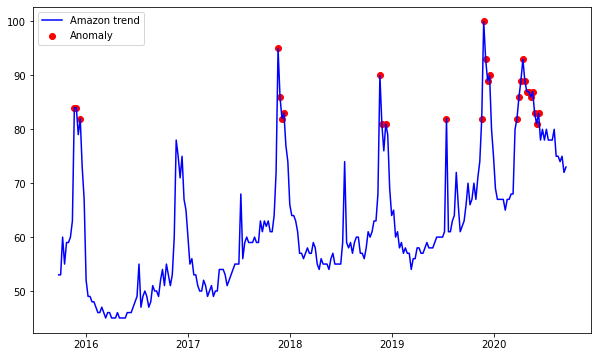

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(result['Amazon'], color='blue', label = 'Amazon trend')
ax.scatter(a.index, a['Amazon'], color='red', label = 'Anomaly')

plt.legend()
plt.show()

In [52]:
a.index

DatetimeIndex(['2015-11-22', '2015-11-29', '2015-12-13', '2017-11-19',
               '2017-11-26', '2017-12-03', '2017-12-10', '2018-11-18',
               '2018-11-25', '2018-12-09', '2019-07-14', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07'],
              dtype='datetime64[ns]', name='date', freq=None)

### STOCK PRICES

In [53]:
tesla_stock = pd.read_csv('data/stocks/TSLA.csv')
blackrock_stock = pd.read_csv('data/stocks/BLK.csv')
beyondmeat_stock = pd.read_csv('data/stocks/BYND.csv')
amazon_stock = pd.read_csv('data/stocks/AMZN.csv')
cooper_stock = pd.read_csv('data/stocks/FCX.csv')
fedex_stock = pd.read_csv('data/stocks/FDX.csv')
silver_stock = pd.read_csv('data/stocks/PAAS.csv')
palantir_stock = pd.read_csv('data/stocks/SSSS.csv')
tilray_stock = pd.read_csv('data/stocks/TLRY.csv')

In [54]:
blackrock_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-15,303.600006,308.540009,301.510010,307.899994,270.344330,950600
1,2015-09-16,309.799988,314.230011,307.809998,313.510010,275.270050,959300
2,2015-09-17,312.230011,316.739990,310.660004,311.630005,273.619354,964300
3,2015-09-18,307.739990,313.579987,307.739990,308.869995,271.196014,1570800
4,2015-09-21,310.200012,313.899994,309.570007,312.390015,274.286713,728200


### ADJUST DATE FORMAT

In [55]:
def change_date_format(data_f):
    data_f['Date']=pd.to_datetime(data_f['Date'])
    data_f['Date']=data_f['Date'].dt.strftime("%m/%d/%y")
    data_f['Date']=pd.to_datetime(data_f['Date'])
    return data_f
#Formatting datetime in stock dataframe
tesla_stock=change_date_format(tesla_stock)
blackrock_stock=change_date_format(blackrock_stock)
beyondmeat_stock=change_date_format(beyondmeat_stock)
amazon_stock=change_date_format(amazon_stock)
cooper_stock=change_date_format(cooper_stock)
fedex_stock=change_date_format(fedex_stock)
silver_stock=change_date_format(silver_stock)
palantir_stock=change_date_format(palantir_stock)
tilray_stock=change_date_format(tilray_stock)
tilray_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-19,23.049999,24.000000,20.100000,22.389999,22.389999,11934500
1,2018-07-20,24.250000,31.799999,23.500000,29.770000,29.770000,13938200
2,2018-07-23,33.480000,34.099998,29.309999,29.450001,29.450001,10042900
3,2018-07-24,28.799999,29.430000,25.250000,25.360001,25.360001,5524200
4,2018-07-25,25.309999,27.150000,24.200001,26.490000,26.490000,3844100
...,...,...,...,...,...,...,...
538,2020-09-08,5.730000,5.890000,5.600000,5.660000,5.660000,3681300
539,2020-09-09,5.680000,5.800000,5.560000,5.650000,5.650000,3506800
540,2020-09-10,5.670000,5.900000,5.620000,5.630000,5.630000,3317500
541,2020-09-11,5.690000,5.690000,5.200000,5.310000,5.310000,4033300


Text(0, 0.5, 'Price')

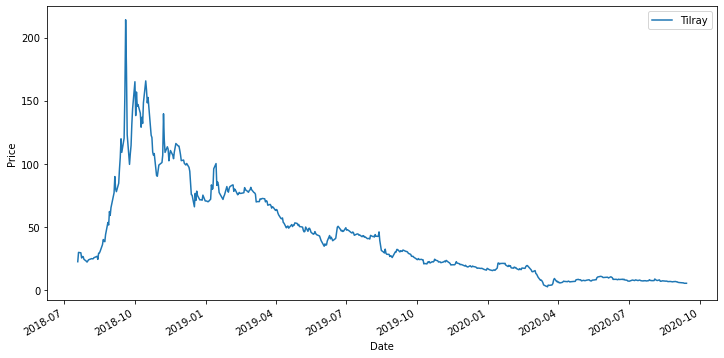

In [56]:
tilray_stock.plot(x='Date', y='Close', figsize=(12,6),label='Tilray')
plt.xlabel('Date')
plt.legend(loc="upper right")
plt.ylabel('Price')

In [57]:
result[result['Tesla'] >= 6]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2016-03-27,8,5,46,3,0,0,1,0,1,0,0,0,1,0,0,0
2016-04-03,6,5,45,3,0,0,1,0,1,0,0,0,1,0,0,0
2017-11-12,6,5,72,4,0,0,3,0,1,0,0,0,1,0,0,0
2018-02-04,6,5,57,3,0,0,4,0,1,0,0,0,1,0,0,0
2019-11-17,12,4,82,4,0,0,26,0,1,0,0,0,1,0,0,0
2019-11-24,12,4,100,3,0,0,19,0,1,0,1,0,1,0,0,0
2020-02-02,8,4,67,3,0,0,30,0,1,0,0,0,1,0,0,0
2020-07-05,6,4,80,5,0,1,21,1,1,0,0,1,1,1,0,1
2020-07-12,6,4,78,5,0,0,21,1,1,0,0,1,1,0,0,1


In [58]:
result[result['Pan American Silver'] >= 1]

,Tesla,Wells Fargo,Amazon,FedEx,Tilray,Palantir Technologies,Beyond Meat,Pan American Silver,Anomaly_Tesla,Anomaly_Wells_Fargo,Anomaly_Amazon,Anomaly_FedEx,Anomaly_Tilray,Anomaly_Palantir_Technologies,Anomaly_Beyond_Meat,Anomaly_Pan_American_Silver
date,,,,,,,,,,,,,,,,
2016-04-17,3,5,45,3,0,0,1,1,0,0,0,0,1,0,0,1
2018-11-11,3,5,68,3,0,0,6,1,0,0,0,0,1,0,0,1
2019-02-24,4,5,57,4,0,0,9,1,0,0,0,0,1,0,0,1
2019-03-03,4,5,57,4,0,0,9,1,0,0,0,0,1,0,0,1
2019-07-14,4,5,82,4,0,0,35,1,0,0,0,0,1,0,0,1
2019-07-21,4,4,61,4,0,0,58,1,0,0,0,0,1,0,1,1
2019-07-28,4,5,61,4,0,0,81,1,0,0,0,0,1,0,1,1
2019-08-04,3,5,63,4,0,0,47,1,0,0,0,0,1,0,1,1
2019-08-11,4,5,64,4,0,0,40,1,0,0,0,0,1,0,0,1


In [59]:
result.quantile(.95)

Tesla                             6.00
Wells Fargo                       6.00
Amazon                           86.00
FedEx                             5.00
Tilray                            0.00
Palantir Technologies             0.00
Beyond Meat                      41.30
Pan American Silver               1.00
Anomaly_Tesla                     1.00
Anomaly_Wells_Fargo               1.00
Anomaly_Amazon                    1.00
Anomaly_FedEx                     1.00
Anomaly_Tilray                    1.00
Anomaly_Palantir_Technologies     0.00
Anomaly_Beyond_Meat               0.05
Anomaly_Pan_American_Silver       1.00
Name: 0.95, dtype: float64